In [ ]:
!pip3 uninstall sklearn
!pip3 uninstall joblib

# Clustering Jerárquico

In [1]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico

In [2]:
# Carga del dataset
df = pd.read_csv("../Datos/shopping_data.csv", sep = ",")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print("Dimensiones del dataset:",df.shape)

Dimensiones del dataset: (200, 5)


Este dataset tiene de features una ID asociada a cada uno de los 200 clientes, el género binario, la edad de la persona, el ingreso anual (en miles de dolares) y un puntaje asociado a cuán a menudo un cliente gasta plata en el shopping siendo 100 el cliente que más gasta.

Vamos a tratar de agrupar a los clientes utilizando solo dos features del dataset: su ganancia anual y el puntaje de gastos

In [4]:
# Armamos una matriz con las ultimas dos columnas del dataframe
matriz_df = df.iloc[:,3:5].values

matriz_df[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [5]:
# Paquete de scipy que tiene la clase 'dendograma'
import scipy.cluster.hierarchy as shc

Vamos a realizar un dendograma del dataset utilizando el método 'ward' para calcular distancias (es el que se suele ultilizar y viene por default). Este método minimiza la varianza dentro de un cluster y maxima la varianza entre clusters.

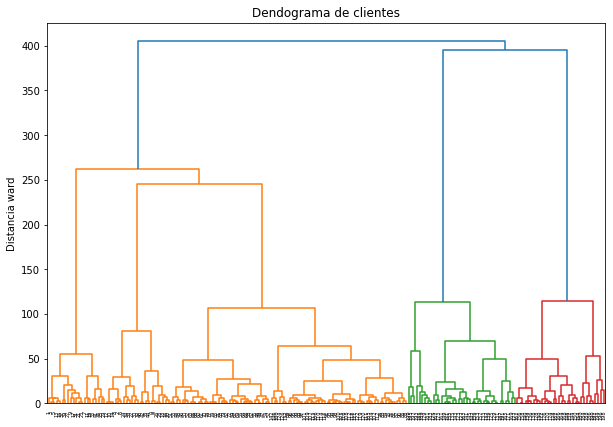

In [6]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma. 
dend = shc.dendrogram(shc.linkage(matriz_df, method='ward')) 

Agregamos una línea horizontal para determinar el nro de clústers - K

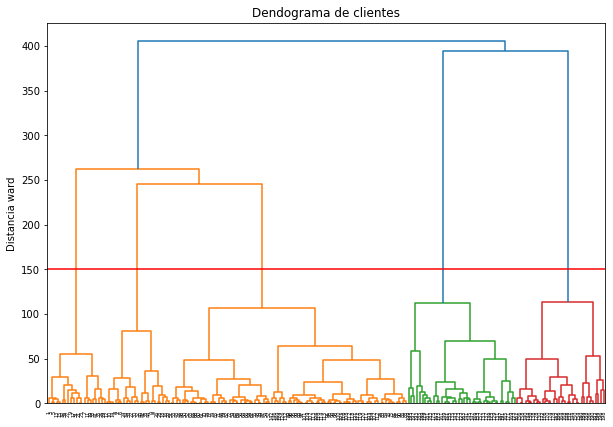

In [16]:
# Plot del dendograma del dataset de clientes
plt.figure(figsize=(10, 7))
plt.title("Dendograma de clientes")
plt.ylabel("Distancia ward")

# Con la función 'dendogram' graficamos el dendograma. 
dend = shc.dendrogram(shc.linkage(matriz_df, method='ward')) 
plt.axhline(150, c='r')

Se observa que el corte intersecta con 5 líneas verticales, esto significa que vamos a utilizar el método de clustering jerárquico de sklearn con n_clusters=5

In [12]:
# Importo el método de clustering jerárquico (bottom-up)
from sklearn.cluster import AgglomerativeClustering

Ahora sí aplicamos el método de clusterización jerárquica (bottom-up) con 5 clusters, la distancia euclidea para la afinidad y la distancia ward para el linkage

In [17]:
# Creamos el modelo
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(matriz_df)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

Veamos cómo se ven los datos agrupados en el espacio de features

Text(0, 0.5, 'Puntaje de gastos')

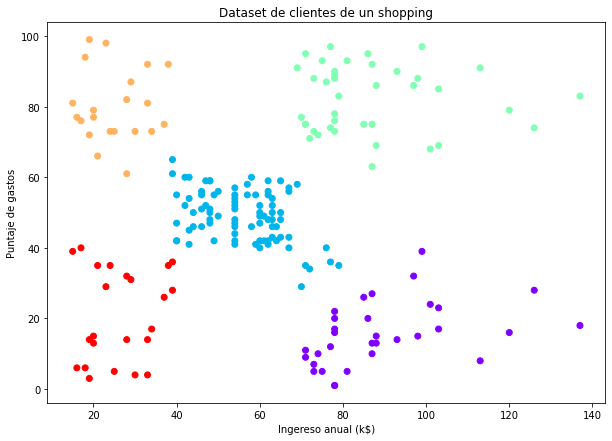

In [18]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(10, 7))
plt.title("Dataset de clientes de un shopping")
plt.scatter(matriz_df[:,0], matriz_df[:,1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Ingereso anual (k$)")
plt.ylabel("Puntaje de gastos")

**Insights**:

El cluster violeta, abajo a la derecha, corresponde a clientes con salarios altos pero que gastan poco en el shopping. Estos son clientes que gastan con cuidado su dinero y no suelen despilfarrar. El cluster verde representa a clientes con mucho salario y que gastan mucho en shoppings. Sin dudas, una compañía debería impactar de publicidad a estos tipos de clientes porque son susceptibles a las compras. Por otro lado, el cluster celeste es el de clientes 'promedio'.

¿Qué otras características podemos observar?